Para los datos de los archivos "bateria_tableta.txt" y "Salarios_minimos.csv":

- Realiza regresiones polinomiales de orden 1, 3, 5 y 7.

- Compara el R2 que te da cada modelo.

- Crea una gráfica con una nube de dispersión (datos originales) y tus modelos.

Separa adecuadamente con Markdown.

# 1. ACTIVIDAD DE bateria_tableta.txt

**1.1. Cargar y preparar datos**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

df_bat = pd.read_csv('bateria_tableta.txt')
X = df_bat[['carga']].values
y = df_bat['duracion'].values

**1.2. Configurar la gráfica**

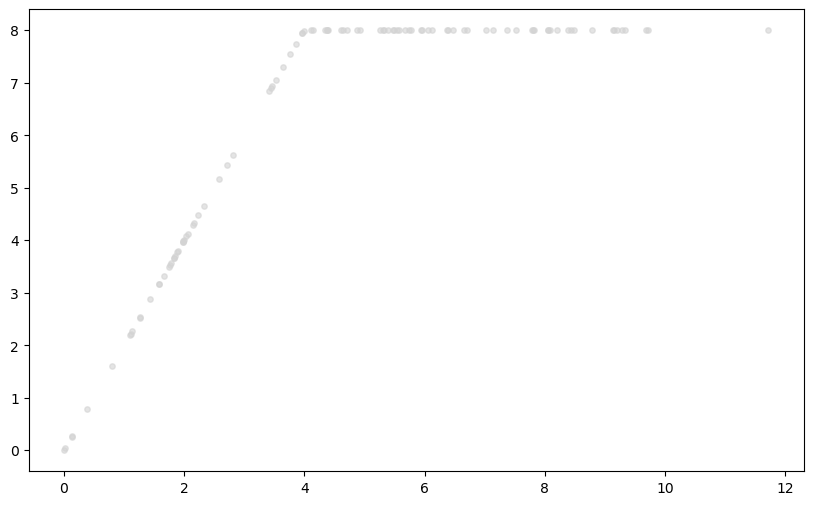

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='lightgray', label='Datos Originales (Dispersión)', s=15, alpha=0.6)

# Puntos auxiliares para que las líneas se vean suaves y no "picudas"
X_smooth = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

**1.3. Graficar sobre los grados solicitados**

--- R² Batería Tableta ---
Grado 1: R² = 0.6872
Grado 3: R² = 0.9781
Grado 5: R² = 0.9954
Grado 7: R² = 0.9981


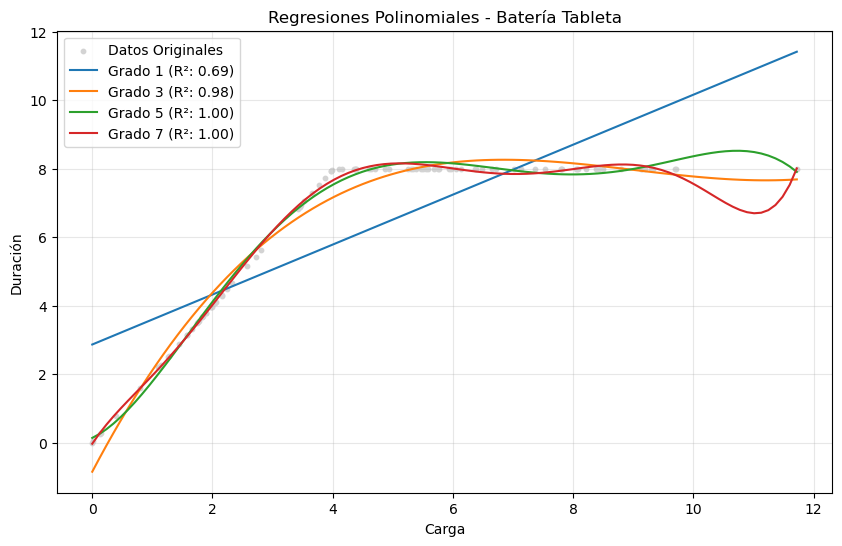

In [25]:
# Grados a evaluar
grados = [1, 3, 5, 7]
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='lightgray', label='Datos Originales', s=10)

# Generar puntos para la línea suave de predicción
X_smooth = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

print("--- R² Batería Tableta ---")
for g in grados:
    # Transformación polinomial
    poly = PolynomialFeatures(degree=g)
    X_poly = poly.fit_transform(X)
    X_smooth_poly = poly.transform(X_smooth)
    
    # Ajuste del modelo
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # Predicciones y R2
    y_pred = model.predict(X_poly)
    y_smooth = model.predict(X_smooth_poly)
    r2 = r2_score(y, y_pred)
    
    print(f"Grado {g}: R² = {r2:.4f}")
    plt.plot(X_smooth, y_smooth, label=f'Grado {g} (R²: {r2:.2f})')

plt.title('Regresiones Polinomiales - Batería Tableta')
plt.xlabel('Carga')
plt.ylabel('Duración')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Se observa que la de grado 1 es la que tiene peor R2 ya que la forma original de los datos no se comoda para nada bien a una línea, mientras que los otros grados al ser más flexibles quedan mejor y por ello mejor R2.**

# 2. ACTIVIDAD DE Salarios_minimos.csv

 **2.1. Cargar y definir los datos**

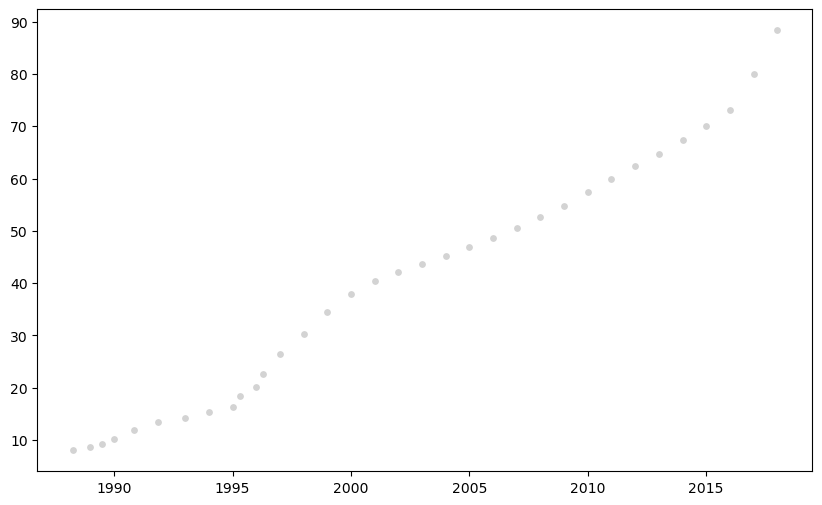

In [17]:
df_sal = pd.read_csv('Salarios_minimos.csv')
X_sal = df_sal[['Periodo']].values
y_sal = df_sal['Salario'].values

plt.figure(figsize=(10, 6))
plt.scatter(X_sal, y_sal, color='lightgray', label='Datos Originales', s=15)

**2.2. Generar puntos para las líneas**


--- R² Salarios Mínimos ---
Grado 1: R² = 0.9845
Grado 3: R² = 0.9857
Grado 5: R² = 0.9858
Grado 7: R² = 0.9858


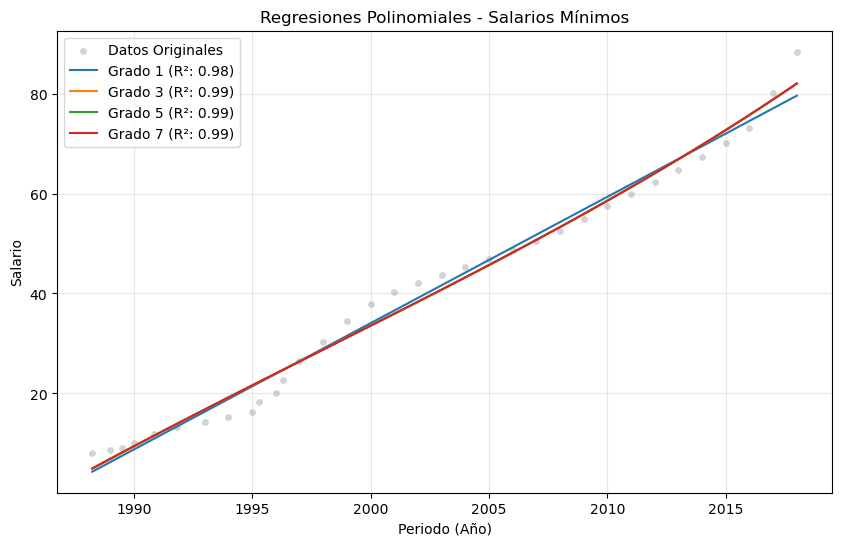

In [20]:
# Cargar datos
df_sal = pd.read_csv('Salarios_minimos.csv')
X_sal = df_sal[['Periodo']].values
y_sal = df_sal['Salario'].values

plt.figure(figsize=(10, 6))
plt.scatter(X_sal, y_sal, color='lightgray', label='Datos Originales', s=15)

# Generar puntos para la línea suave
X_sal_smooth = np.linspace(X_sal.min(), X_sal.max(), 200).reshape(-1, 1)

print("\n--- R² Salarios Mínimos ---")
for g in grados:
    poly = PolynomialFeatures(degree=g)
    X_poly = poly.fit_transform(X_sal)
    X_smooth_poly = poly.transform(X_sal_smooth)
    
    model = LinearRegression()
    model.fit(X_poly, y_sal)
    
    y_pred = model.predict(X_poly)
    y_smooth = model.predict(X_smooth_poly)
    r2 = r2_score(y_sal, y_pred)
    
    print(f"Grado {g}: R² = {r2:.4f}")
    plt.plot(X_sal_smooth, y_smooth, label=f'Grado {g} (R²: {r2:.2f})')

plt.title('Regresiones Polinomiales - Salarios Mínimos')
plt.xlabel('Periodo (Año)')
plt.ylabel('Salario')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Se observa que todos los grados tienen un R2 casi igual y muy bueno, también se ven que todas las líneas se ven como líneas rectas pero lo que parecer estar pasando es que al ser una cantidad de datos muy cercana entre sí las curvaturas esperadas de los grados no son perceptibles, es como hacerle mucho zoom a un circulo y en lugar de ver curvas ver líneas.**